<a href="https://colab.research.google.com/github/coutinhoware/data-science/blob/main/%20ALURA/Redes%20Neurais%20Convolucionais%20-%20Deep%20Learning%20com%20PyTorch/3_6_Padr%C3%B5es_Complexos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALURA/Redes Neurais Convolucionais - Deep Learning com PyTorch/

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from scipy.signal import convolve
from skimage import io

import numpy as np

In [1]:
!wget https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
!mv image_2007_000032.jpg?dl=0 plane.jpg

--2022-04-30 14:36:22--  https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0nrix9eknyybuqk/image_2007_000032.jpg [following]
--2022-04-30 14:36:23--  https://www.dropbox.com/s/raw/0nrix9eknyybuqk/image_2007_000032.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1b55d8ee585b3363480a4b6c60.dl.dropboxusercontent.com/cd/0/inline/BkaEWP3LYY5ECZrnkdjdXMmIZS9VHJxhx90uF_NIcrFP8rx8BkIuUJfoiGRvrkp_XTrhhpZmp25_sUGmFBzrSz7_DyD3zQBo3PQQfc1GmuknKGmzvSB0vxIo4H3N6ReQMRKuNdUaT8YweBIsX-JgBaV9fw-nEhWU_KMNA4QSO_JCMA/file# [following]
--2022-04-30 14:36:23--  https://uc1b55d8ee585b3363480a4b6c60.dl.dropboxusercontent.com/cd/0/inline/BkaEWP3LYY5ECZrnkdjdXMmIZS9VHJxhx90

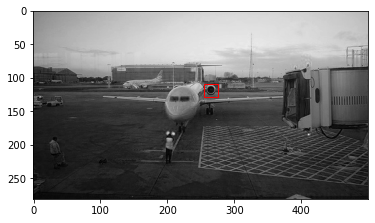

In [9]:
# Lê a imagem do avião e extrai apenas um canal
img = io.imread('plane.jpg')
img = img[:,:,0]

# Coordenadas do retângulo sobre a turbina
retangulo = [109, 129, 255, 275]

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

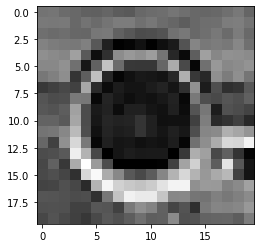

In [14]:
# Demonstranção do kernel contendo o padrão que se busca (turbina)

patch = img[retangulo[0]:retangulo[1], retangulo[2]:retangulo[3]] # faz um 'crop' da turbina
patch = patch - patch.mean()                                      # 'centraliza' os valores do kernel
patch = np.flip(patch)

plt.imshow(patch, cmap='gray')

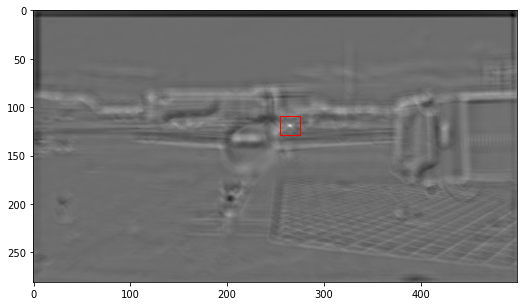

In [18]:
resultado = convolve(img, patch, mode='same')

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(resultado, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

### Conclusão: a imagem convoluída acima nos mostra que no local onde a correspondência da imagem com o kernel (patch) é maior, existe um pico de brilho.



## Exercício: 
####Selecione uma diferente região da imagem para ser utilizada como kernel de convolução. A alteração deve ser feita na variável boundaries, que atualmente possui os seguintes valores referentes à turbina na imagem:

`boundaries = [109, 129, 255, 275]`

####Como sugestão, você pode selecionar a pessoa à frente do avião, sinalizando para o seu pouso.

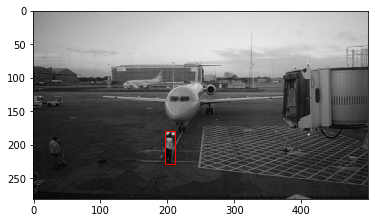

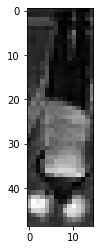

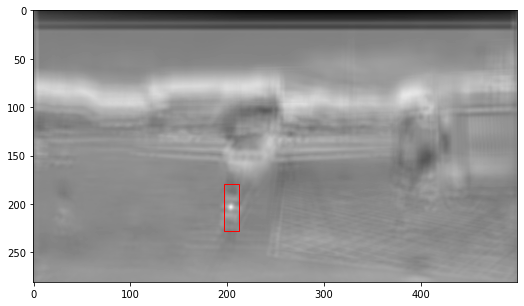

In [28]:
# Coordenadas da pessoa na frente do avião

retangulo = [179, 228, 197, 212]

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

# Demonstranção do kernel contendo o padrão que se busca (turbina)

patch = img[retangulo[0]:retangulo[1], retangulo[2]:retangulo[3]] # faz um 'crop' da turbina
patch = patch - patch.mean()                                      # 'centraliza' os valores do kernel
patch = np.flip(patch)

fig, ax = plt.subplots()
ax.imshow(patch, cmap='gray')

# Convolução do novo kernel com a imagem e análise da saída

resultado = convolve(img, patch, mode='same')

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(resultado, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))